In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [9]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data.shape

(200, 5)

In [11]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

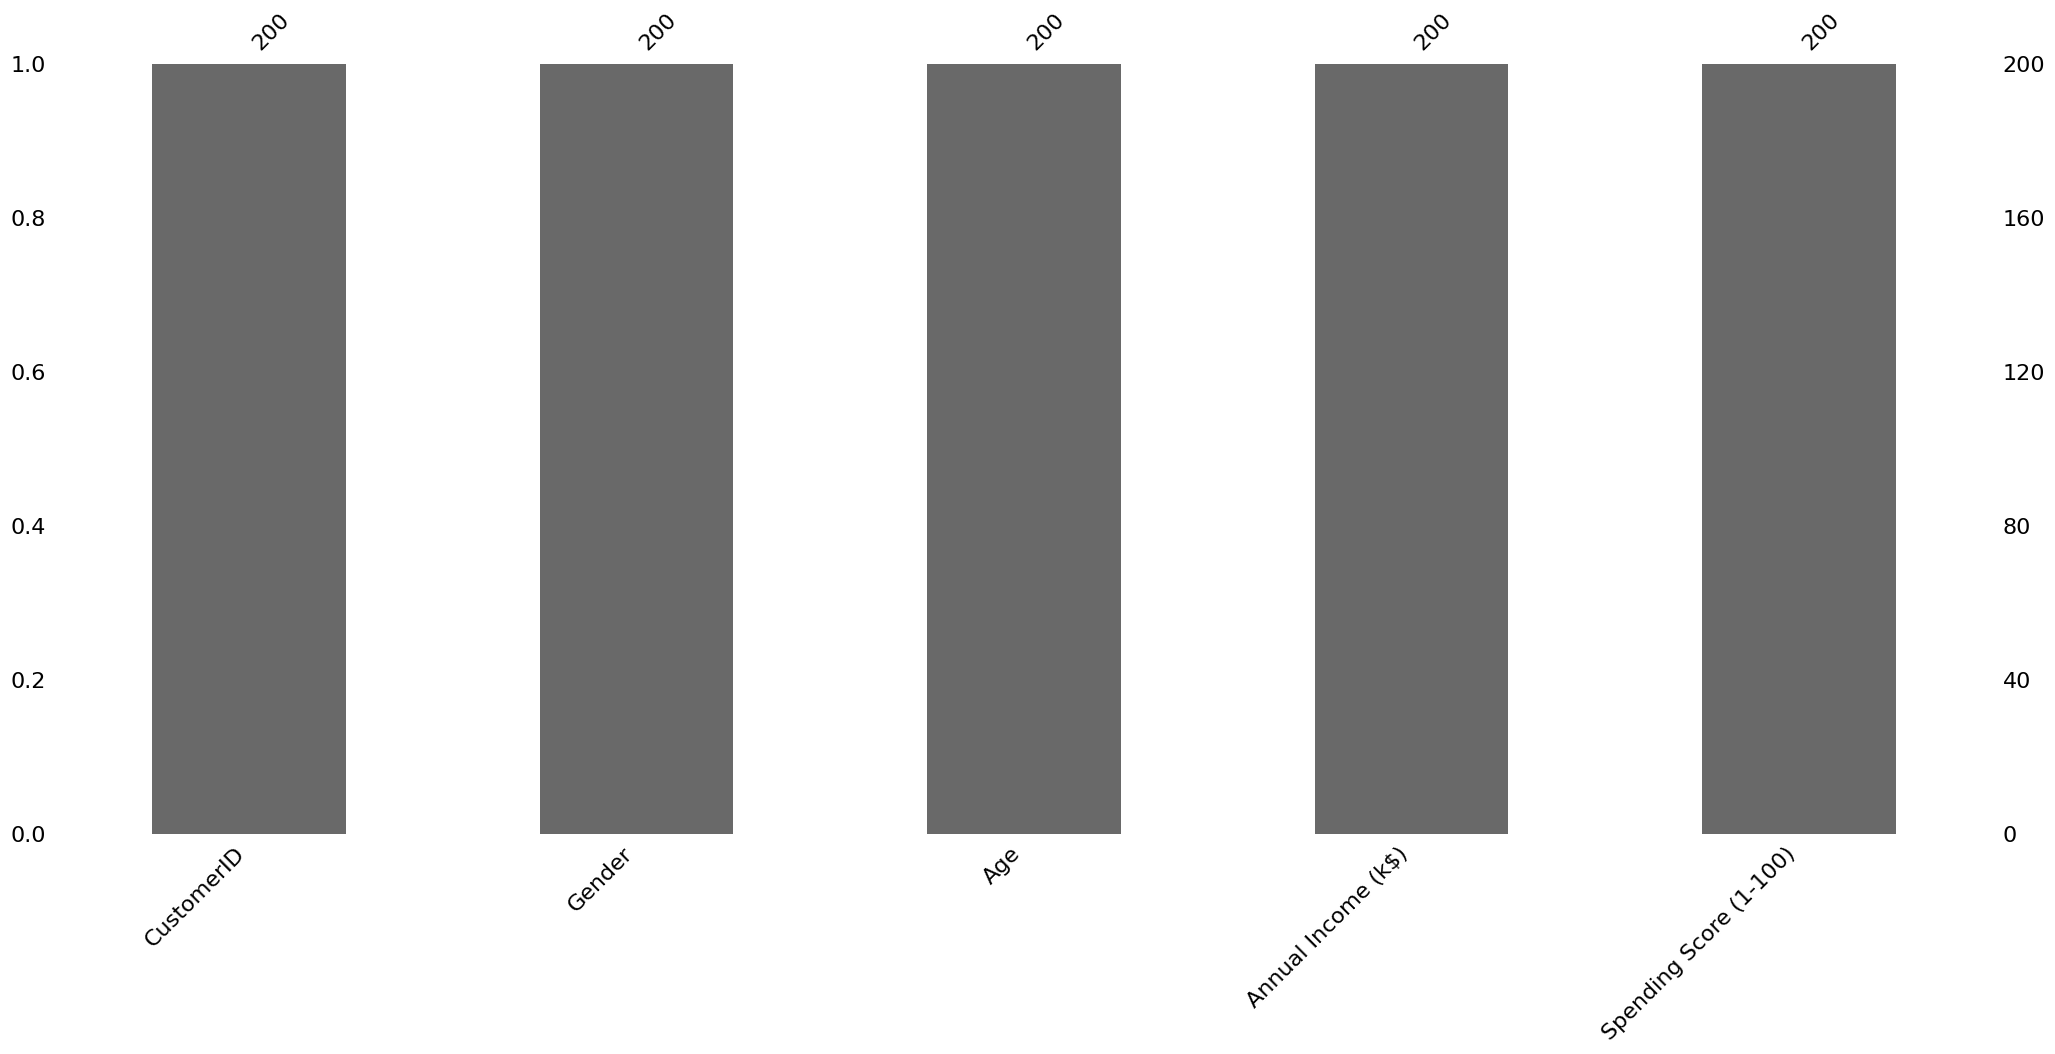

In [15]:
import missingno as msno
msno.bar(customer_data)

DATA VISUALISATION &EDA


In [16]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

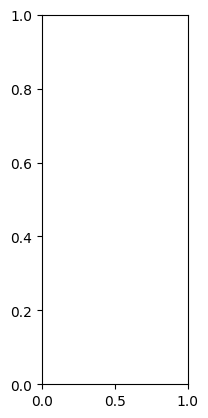

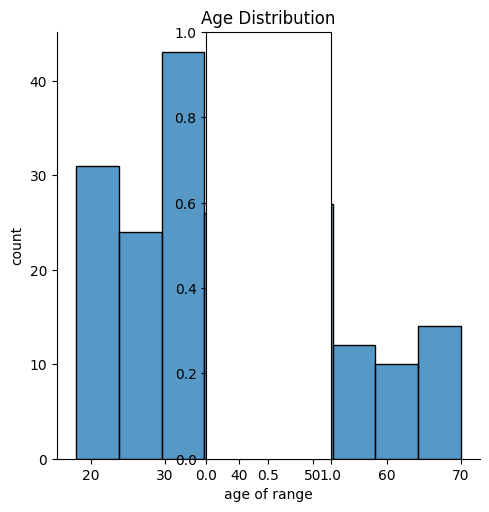

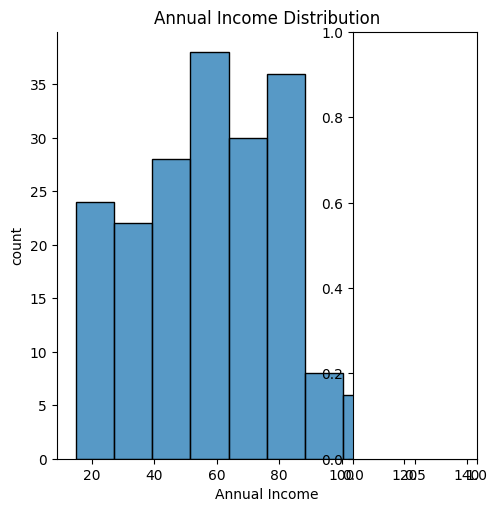

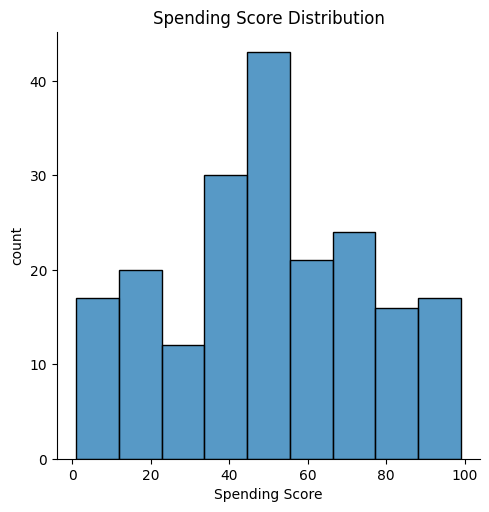

In [19]:
plt.subplot(1,3,1)
sns.displot(customer_data['Age'])
plt.title('Age Distribution')
plt.xlabel("age of range")
plt.ylabel("count")
plt.subplot(1,3,2)
sns.displot(customer_data['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.xlabel("Annual Income")
plt.ylabel("count")
plt.subplot(1,3,3)
sns.displot(customer_data['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.xlabel("Spending Score")
plt.ylabel("count")
plt.show()



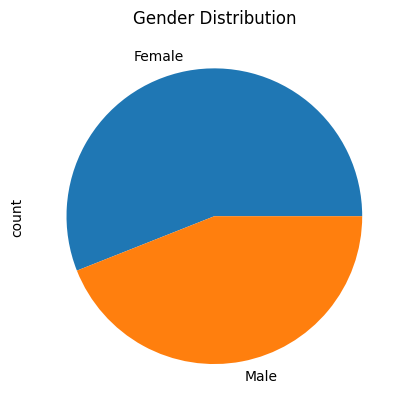

In [30]:
df=customer_data.groupby('Gender').size()
df.plot(kind='pie'),
subplot=True
plt.title('Gender Distribution'),
plt.ylabel("count"),
explode=[0,0.001],
autopct='%.2f%%'

plt.show()


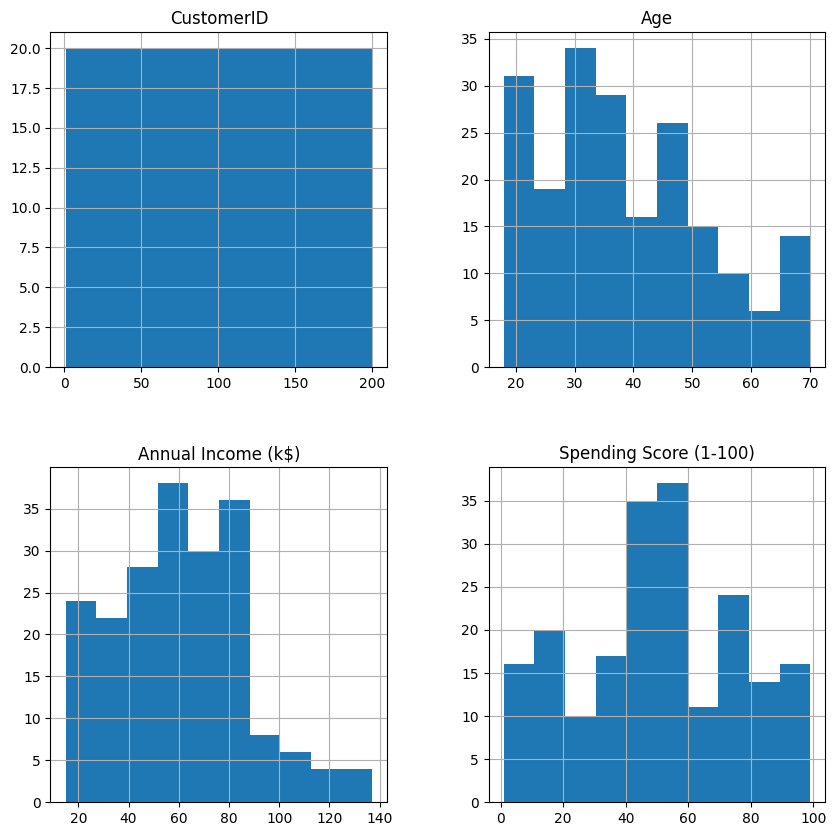

In [31]:
customer_data.hist(figsize=(10,10))
plt.show()

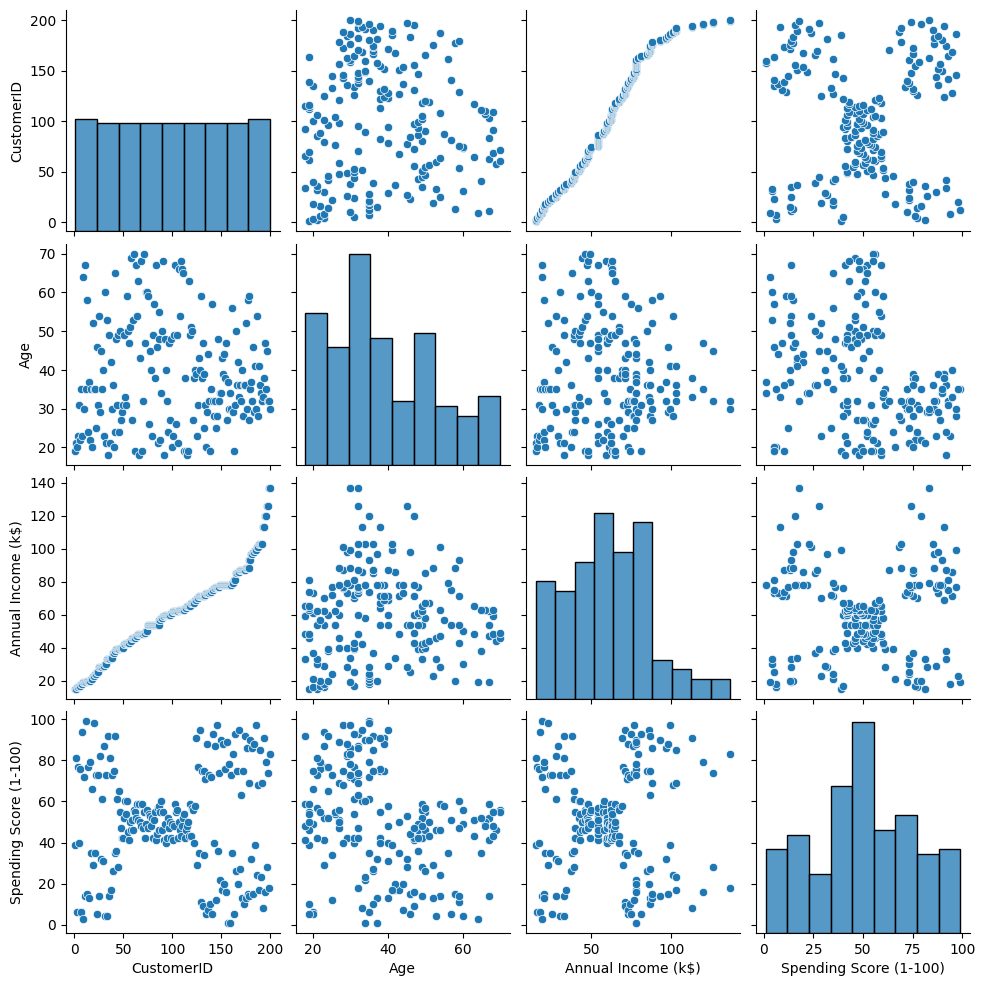

In [37]:
sns.pairplot(customer_data)

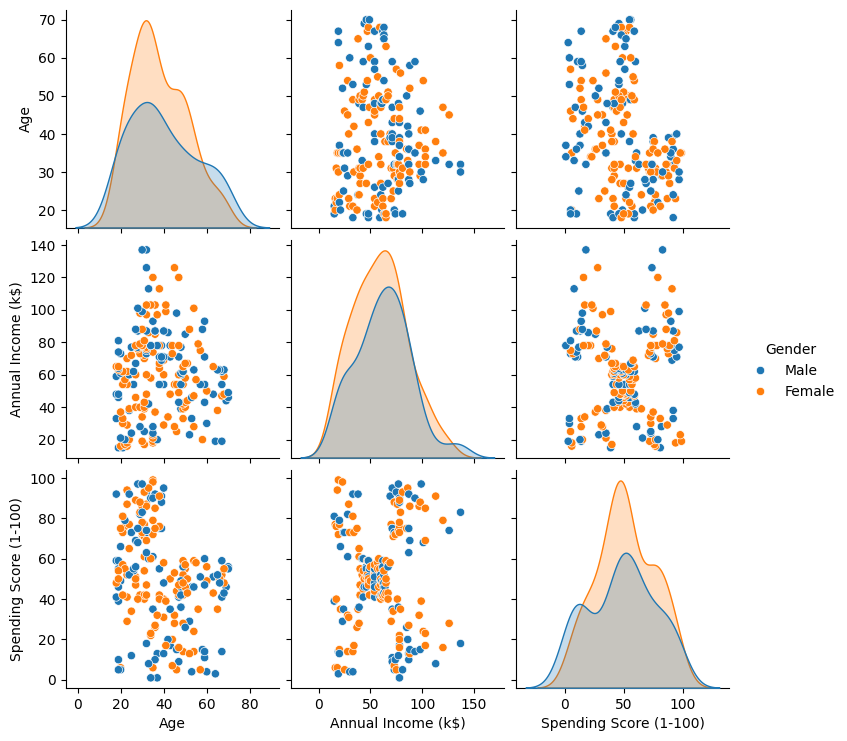

In [36]:
sns.pairplot(customer_data,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender')


K-Mean Clustering


In [38]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [40]:
x=customer_data.iloc[:, [3,4]].values

In [41]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [42]:
from sklearn.cluster import KMeans

In [45]:
k=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmean.fit(x)
  k.append(kmean.inertia_)

Text(0.5, 0, 'Number of clusters')

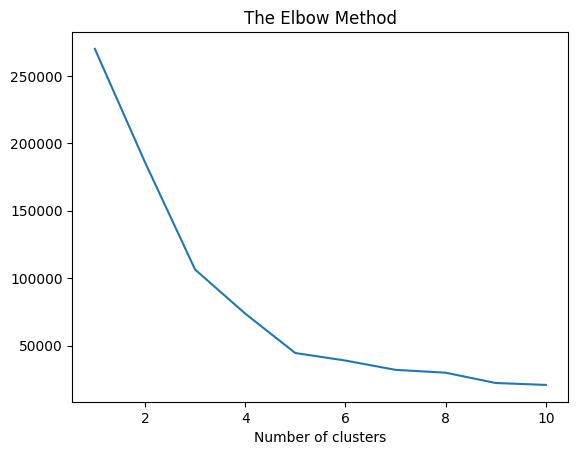

In [46]:
plt.plot(range(1,11),k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

In [47]:
model=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_means=model.fit_predict(x)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

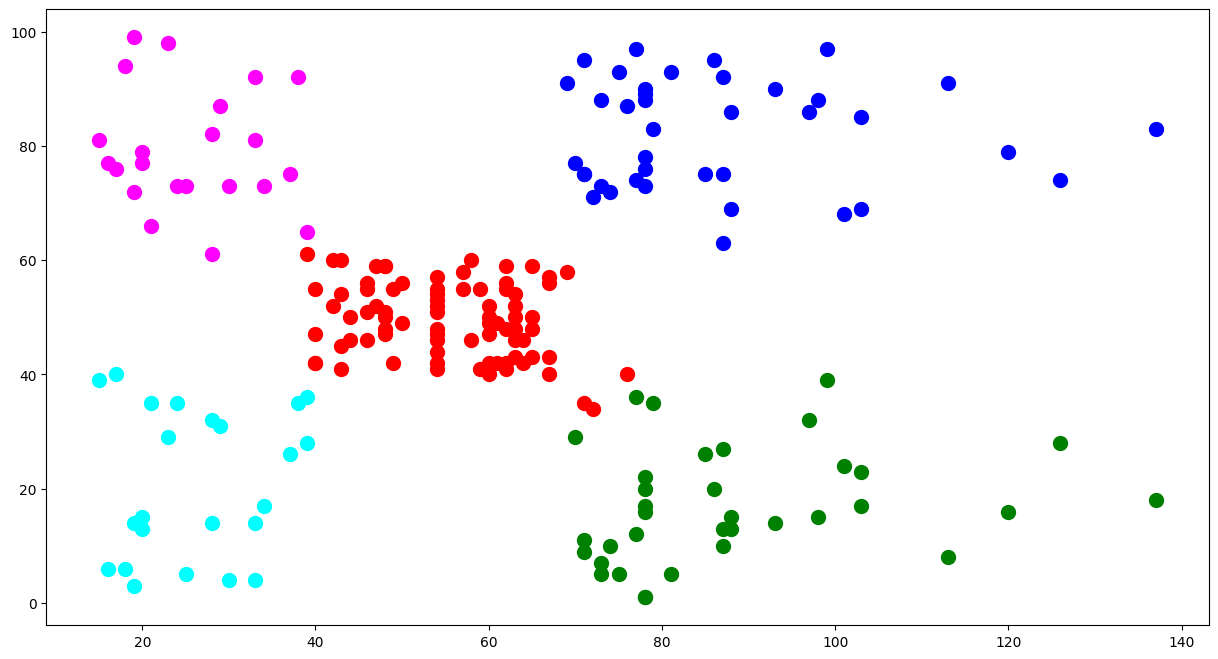

In [50]:
plt.figure(1 , figsize=(15,8))
plt.scatter(x[y_means==0,0], x[y_means==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_means==1,0], x[y_means==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_means==2,0], x[y_means==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[y_means==3,0], x[y_means==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[y_means==4,0], x[y_means==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.title('k means Clustering algorithm')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()